<a href="https://colab.research.google.com/github/udsey/DS_projets/blob/main/Linear_Regression_pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Функции

In [ ]:
def price_volume_chart(df, name):
    volume = {"name": "Volume", 
              "type": "bar", 
              "x": df['Date'],
              "y": df['Volume']
             }
    
    fig = make_subplots(rows=2, cols=1, row_heights=[0.7, 0.3])
    fig.add_trace(go.Candlestick(x=df['Date'],
                                 open=df['Open'], high=df['High'],
                                 low=df['Low'], close=df['Close/Last'],
                                 name='Open/Close/High/Low'),
                  row=1, col=1)
    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'],
                         opacity=True, name='Volume'),
                  row=2, col=1)
    fig.update_layout(title=name)


    fig.show()

In [ ]:
def windowed(X, y, date, size, step=1):
    a = []
    b = []
    d = []
    for i in range(0, (len(X)-size), step):
        a.append(X.iloc[i:i+size].values)
        b.append(y.iloc[i+size])
        d.append(date.iloc[i+size].normalize())
    return a, b, d

In [ ]:
def get_X_y(df, features_col, target_col, size=7):
    X = df[features_col]
    y = df[target_col]
    X, y, date =windowed(X, y, df['Date'], size=size, step=1)
    return X, y, date

In [ ]:
def plot_true_pred(y_true, y_pred, x):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y_true, name='true value'))
    fig.add_trace(go.Scatter(x=x, y=y_pred,
                             name='predicted'))

    fig.show()

Загружаем данные

In [ ]:
AAPL = pd.read_csv('https://drive.google.com/uc?export=download&id=14aDAtFebEqsNA5mccwkVheP7yKuZSqCq')
AMD = pd.read_csv('https://drive.google.com/uc?export=download&id=1pdlRFkhzk0PurP0Yn-ONAnXhrmdXTlUJ')
AMZN = pd.read_csv('https://drive.google.com/uc?export=download&id=1gNhzFH1gl80P0zvj0B0S5Ai_QD_2kCzJ')
CSCO = pd.read_csv('https://drive.google.com/uc?export=download&id=13betAILqnyZ-NH4_MCb06qV-LARm3h57')
FCBK = pd.read_csv('https://drive.google.com/uc?export=download&id=1-wORhztuywxtLAiPujKrPjOWGn968I2s')
MSFT = pd.read_csv('https://drive.google.com/uc?export=download&id=1Qnw22rT6HM0wzbN0d9C3fmpZQvgbKuKM')
QCOM = pd.read_csv('https://drive.google.com/uc?export=download&id=1fSOYxlHQAnZUfIHQLwy573Nn96Eu66Mj')
SBUX = pd.read_csv('https://drive.google.com/uc?export=download&id=194ZId8YQdjzozJ8jfzUyhvltuTpjBy6m')
ZNGA = pd.read_csv('https://drive.google.com/uc?export=download&id=1wJXAZ4YDAOKZDVMAdCvXqdJ0f3DYae6W')
TSLA = pd.read_csv('https://drive.google.com/uc?export=download&id=1OIIPP0d8qXikja-YYAlyXNNUwWrQdsvr')

Для всех датасетов:
* Удаляем пробелы в названиях колонок
* Удаляем знак $
* Приводим дату к формату datetime
* Приводим числовые колонки к соответствующему типу

In [ ]:
'''
Удаляем пробелы в названиях колонок
Удаляем знак $
'''
df_list = [AAPL, AMD, AMZN, CSCO, FCBK, MSFT, QCOM, SBUX, ZNGA, TSLA]
df_names = ['Apple', 'Advanced Micro Devices', 'Amazon.com',
            'Cisco Systems', 'Facebook', 'Microsoft',
            'QUALCOMM Incorporated', 'Starbucks',
            'Zynga', 'Tesla']
cols_to_repl = ['Close/Last', 'Open', 'High', 'Low']
for df in df_list:
    df.columns = df.columns.str.strip(' ')
    df[cols_to_repl] = df[cols_to_repl].apply(lambda x: x.str.replace('$', ''))
    df[cols_to_repl] = df[cols_to_repl].apply(pd.to_numeric)
    df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y')
ZNGA.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-12-04,8.78,42383120,8.430,8.84,8.427
1,2020-12-03,8.42,21104590,8.380,8.45,8.310
2,2020-12-02,8.32,16373330,8.145,8.39,8.120
3,2020-12-01,8.24,12741720,8.200,8.28,8.090
4,2020-11-30,8.25,17220000,8.250,8.34,8.065


# Задача 1: Визуализируй это

Загрузите данные и выполните следующие задания:
- постройте графики стоимости акций на начало каждого дня
- отразите на графике объёмы торгов за каждый день. Прокомментируйте
полученные графики: определите, какие события могли повлиять на повышение
объёма (отчёт компании, кризис и т. п.)
- добавьте ко всем графикам легенду
- определите, цены каких компаний наиболее и наименее скоррелированы


---



---





## Корреляционные матрицы


Для удобства отрисовки объединим все данные по открытию в один датасет (open_df)


In [ ]:
df_ab_names = ['_AAPL', '_AMD', '_AMZN', '_CSCO', '_FCBK', '_MSFT',
            '_QCOM', '_SBUX', '_ZNGA', '_TSLA']
open_df = df_list[0][['Date', 'Open']]
for i, df_next in enumerate(df_list[1:]):
    open_df = pd.merge(open_df, df_next[['Date', 'Open']], on = 'Date', 
                       suffixes= (df_ab_names[i], df_ab_names[i+1]))
open_df.rename(columns={'Open': 'Open_TSLA'}, inplace=True)


In [ ]:
open_df.head()

,Date,Open_AAPL,Open_AMD,Open_AMZN,Open_CSCO,Open_FCBK,Open_MSFT,Open_QCOM,Open_SBUX,Open_ZNGA,Open_TSLA
0,2020-12-04,122.60,92.58,3198.21,43.89,280.30,214.22,150.30,101.35,8.430,591.01
1,2020-12-03,123.52,94.06,3205.46,43.78,286.25,214.61,151.04,99.02,8.380,590.02
2,2020-12-02,122.02,92.89,3221.65,43.39,285.36,214.88,150.51,98.51,8.145,556.44
3,2020-12-01,121.01,92.25,3188.50,43.01,279.16,214.51,148.79,99.00,8.200,597.59
4,2020-11-30,116.97,87.33,3208.48,42.44,276.03,214.10,144.63,98.20,8.250,602.21


Построим корреляционную матрицу для цены на момент открытия


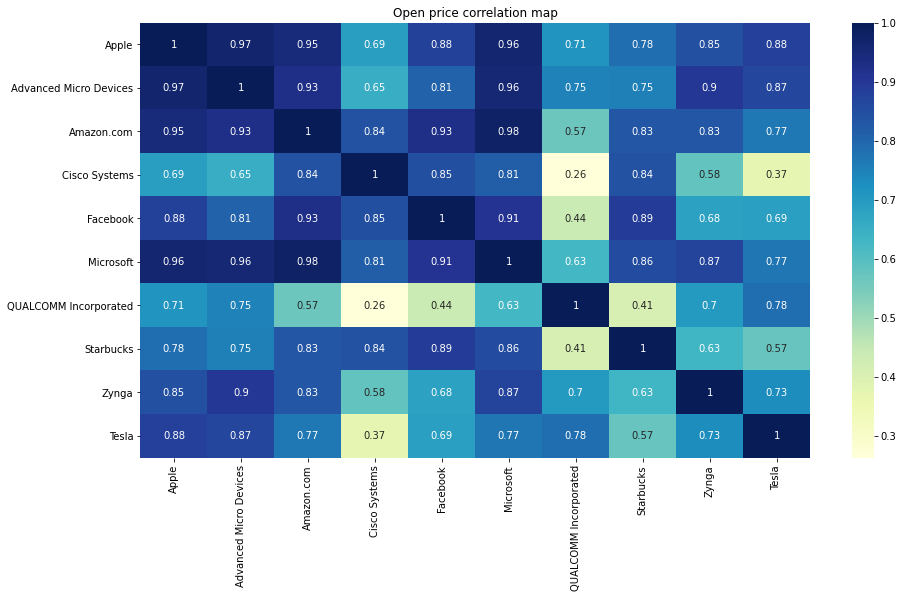

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(open_df.corr(), annot=True, cmap="YlGnBu",
                 xticklabels=df_names, yticklabels=df_names)
ax.set_title('Open price correlation map')
plt.show()

Тоже самое сделаем для объемов торгов

In [ ]:
volume_df = df_list[0][['Date', 'Volume']]
for i, df_next in enumerate(df_list[1:]):
    volume_df = pd.merge(volume_df, df_next[['Date', 'Volume']], on = 'Date', 
                       suffixes= (df_ab_names[i], df_ab_names[i+1]))
volume_df.rename(columns={'Volume': 'Volume_TSLA'}, inplace=True)


In [ ]:
volume_df.head()

,Date,Volume_AAPL,Volume_AMD,Volume_AMZN,Volume_CSCO,Volume_FCBK,Volume_MSFT,Volume_QCOM,Volume_SBUX,Volume_ZNGA,Volume_TSLA
0,2020-12-04,78260420,45570270,2913611,17319800,10880300,24666040,12759950,6952704,42383120,29401310
1,2020-12-03,78967630,35859720,2892039,27710710,12921690,25120920,6355269,6264077,21104590,42552000
2,2020-12-02,89004200,57988820,3129304,17422160,17361620,23724510,7800326,3377940,16373330,47775650
3,2020-12-01,128166800,58670530,4544382,23948790,20777910,30931320,11910500,4970293,12741720,40382830
4,2020-11-30,169410200,84482980,4063916,34741650,16693340,33064750,8712502,5197253,17220000,63003050


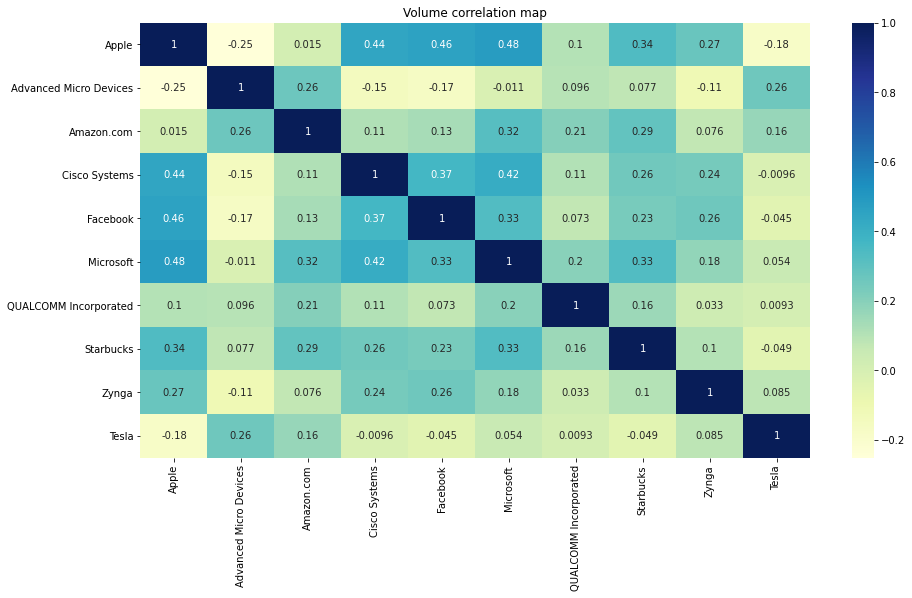

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(volume_df.corr(), annot=True, cmap="YlGnBu",
                 xticklabels=df_names, yticklabels=df_names)
ax.set_title('Volume correlation map')
plt.show()

### Выводы:

* 
* 
*

## Графики

In [ ]:
AAPL.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-12-04,122.25,78260420,122.60,122.8608,121.52
1,2020-12-03,122.94,78967630,123.52,123.7800,122.21
2,2020-12-02,123.08,89004200,122.02,123.3700,120.89
3,2020-12-01,122.72,128166800,121.01,123.4693,120.01
4,2020-11-30,119.05,169410200,116.97,120.9700,116.81


In [ ]:
for name, df in zip(df_names,df_list):
    price_volume_chart(df, name)

### Вывод:



* 
* 
* 

# Задача 2: Смоделируй это
Обучите линейную регрессию для предсказания цены закрытия на текущий день. В
качестве фичей возьмите цены открытия нескольких компаний за 7 дней до текущего
(включая текущий день). Цель обучения - предсказать цену закрытия на последний день рассматриваемого промежутка для одной из компаний.

● Сравните результат с бейзлайном - возвращайте цену открытия в качестве
предсказания. Для сравнения используйте MSE (Mean Square Error).

● Посчитайте функцию ошибки на обучающем множестве и на тестовом. В
качестве тестового множества возьмите последние 100 дней.

● Удостоверьтесь, что на обучающем множестве вы можете легко побить бейзлайн (а на тестовом результат хуже, кроме одной акции с очевидным трендом).

Если вам удалось получить улучшение на тестовом множестве на всех акциях -
поздравляем, вы можете легко заработать несколько миллионов!

In [ ]:
X,y, date = get_X_y(AAPL, 'Open', 'Close/Last', size=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
base_test = [i[-1] for i in X_test]
baseline_test = mean_squared_error(y_test, base_test)

y_pred_train = linreg.predict(X_train)
base_train = [i[-1] for i in X_train]
baseline_train = mean_squared_error(y_train, base_train)

print('Apple\nLinear regression')
print('model MSE =', mean_squared_error(y_test, y_pred))
print('baseline MSE =', baseline_test)
print('model MSE train =', mean_squared_error(y_train, y_pred_train))
print('baseline MSE train =', baseline_train)

plot_true_pred(y_test, y_pred, date[len(y_train):])

Apple
Linear regression
model MSE = 0.044742849199786494
baseline MSE = 0.04017693574840762
model MSE train = 0.4905129919097753
baseline MSE train = 0.5045591092671268


In [ ]:
for name, df in zip(df_names,df_list):
    X,y, _ = get_X_y(df, 'Open', 'Close/Last', size=7)
    X,y, _ = get_X_y(df, 'Open', 'Close/Last', size=7)
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    base_test = [i[-1] for i in X_test]
    baseline_test = mean_squared_error(y_test, base_test)

    y_pred_train = linreg.predict(X_train)
    base_train = [i[-1] for i in X_train]
    baseline_train = mean_squared_error(y_train, base_train)
    
    print('{:>30}'.format(name))
    print('Linear regression:\n')
    print('model MSE =', mean_squared_error(y_test, y_pred))
    print('baseline MSE =', baseline_test)
    print('-'*50)
    print('model MSE train =', mean_squared_error(y_train, y_pred_train))
    print('baseline MSE train =', baseline_train)
    print('\n')
    print('*'*50)
    print('*'*50)
    print('\n')

                         Apple
Linear regression:

model MSE = 0.044742849199786494
baseline MSE = 0.04017693574840762
--------------------------------------------------
model MSE train = 0.4905129919097753
baseline MSE train = 0.5045591092671268


**************************************************
**************************************************


        Advanced Micro Devices
Linear regression:

model MSE = 0.010685412597174999
baseline MSE = 0.010252027722929937
--------------------------------------------------
model MSE train = 0.28460516751792775
baseline MSE train = 0.2977154255177909


**************************************************
**************************************************


                    Amazon.com
Linear regression:

model MSE = 7.447925944230629
baseline MSE = 7.183018072499996
--------------------------------------------------
model MSE train = 317.1200117110059
baseline MSE train = 332.7392811425277


**************************************************

# Задача 3: Спроектируй (Докрути) это
Попробуйте разные варианты фичей, но не забывайте про переобучение - чем больше
признаков, тем больше модель способна “запомнить” исходные данные и менее
эффективна “реальных” данных. Далее приведём некоторые идеи для фичей.

**Идея для фичи №1.** ​ Если взять цены в качестве исходных данных, модель будет
плохо работать с будущим - цены, как правило, это сильно изменчивая категория.
Имеет смысл рассмотреть относительные изменения цен за предыдущие N дней
(буквально - насколько цены последующих дней отличаются от цен за предшествующий
период).

**Идея для фичи №2.** ​ В качестве альтернативы вы можете попробовать предсказать
только коэффициент - во сколько раз изменится цена к вечеру текущего дня (но не
забудьте произвести вычисление функции потерь на абсолютных значениях цены).
Кроме того, можно добавить цену за последний день, чтобы модель могла вывести как
коэффициент, так и абсолютное значение.

**Идея для фичи №3.** ​ Можно использовать некоторые статистики - например, дисперсию
цены за предыдущие дни, отклонения объёмов торгов и т. п. Можно брать скользящие
средние за предыдущие несколько недель.

In [ ]:
df = FCBK.copy()

df['Month'] = df.Date.dt.month
df['Volume_rate'] = df.Volume.diff()
df['Moving_average'] =df['Close/Last'].rolling(window=4).mean().fillna(value=0).shift(1)
df['it_working'] = df.Open + df.High/(df.Low * df.Volume)
size = 7
step = 1
y_data = df['Close/Last']
X_data = df.drop(columns = ['Close/Last'])
date_data = df['Date']
X = []
y = []
date = []

for i in range(0, (len(X_data)-size), step):
    open = X_data['Open'].iloc[i:i+size].tolist()
    other = X_data[['Month', 'Volume',
                    'Volume_rate', 'Moving_average',
                    'it_working']].iloc[i+size].tolist()
    X.append(other + open)
    y.append(y_data.iloc[i+size])
    date.append(date_data.iloc[i+size].normalize())
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
base_test = [i[-1] for i in X_test]
baseline_test = mean_squared_error(y_test, base_test)

y_pred_train = linreg.predict(X_train)
base_train = [i[-1] for i in X_train]
baseline_train = mean_squared_error(y_train, base_train)

print('Linear regression')
print('model MSE =', mean_squared_error(y_test, y_pred))
print('baseline MSE =', baseline_test)
print('model MSE train =', mean_squared_error(y_train, y_pred_train))
print('baseline MSE train =', baseline_train)

plot_true_pred(y_test, y_pred, date[len(y_train):])

Linear regression
model MSE = 0.6791197020199815
baseline MSE = 0.5003262075046553
model MSE train = 2.6797546037804603
baseline MSE train = 5.5970331464427865


In [ ]:
for name, df in zip(df_names,df_list):
    df['Month'] = df.Date.dt.month
    df['Volume_rate'] = df.Volume.diff()
    df['Moving_average'] =df['Close/Last'].rolling(window=4).mean().fillna(value=0).shift(1)
    df['it_working'] = df.Open + df.High/(df.Low * df.Volume)
    size = 7
    step = 1
    y_data = df['Close/Last']
    X_data = df.drop(columns = ['Close/Last'])
    date_data = df['Date']
    X = []
    y = []
    date = []

    for i in range(0, (len(X_data)-size), step):
        open = X_data['Open'].iloc[i:i+size].tolist()
        other = X_data[['Month', 'Volume',
                    'Volume_rate', 'Moving_average',
                    'it_working']].iloc[i+size].tolist()
        X.append(other + open)
        y.append(y_data.iloc[i+size])
        date.append(date_data.iloc[i+size].normalize())
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    base_test = [i[-1] for i in X_test]
    baseline_test = mean_squared_error(y_test, base_test)

    y_pred_train = linreg.predict(X_train)
    base_train = [i[-1] for i in X_train]
    baseline_train = mean_squared_error(y_train, base_train)

    print('{:>30}'.format(name))
    print('Linear regression:\n')
    print('model MSE =', mean_squared_error(y_test, y_pred))
    print('baseline MSE =', baseline_test)
    print('-'*50)
    print('model MSE train =', mean_squared_error(y_train, y_pred_train))
    print('baseline MSE train =', baseline_train)
    print('\n')
    print('*'*50)
    print('*'*50)
    print('\n')

                         Apple
Linear regression:

model MSE = 0.02370686056614848
baseline MSE = 0.04017693574840762
--------------------------------------------------
model MSE train = 0.23921477236744246
baseline MSE train = 0.5045591092671268


**************************************************
**************************************************


        Advanced Micro Devices
Linear regression:

model MSE = 0.007497200553977568
baseline MSE = 0.010252027722929937
--------------------------------------------------
model MSE train = 0.17106224190202746
baseline MSE train = 0.2977154255177909


**************************************************
**************************************************


                    Amazon.com
Linear regression:

model MSE = 5.636655100233257
baseline MSE = 7.183018072499996
--------------------------------------------------
model MSE train = 172.41107584473892
baseline MSE train = 332.7392811425277


*************************************************